In [1]:
import pandas as pd

# Project Imports
from notebooks.consts import *
from notebooks.preprocessing import preprocess_aso_data

# RNaseH Specific Imports
from tauso.features.RNaseH_features import check_motif_presence

# Pandas Display Settings
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)

In [2]:
# Load and preprocess the dataset
# This handles: Filtering Human, Dropping NaNs, Log Correction, and Pre-mRNA Mapping
all_data = preprocess_aso_data(UPDATED_CSV, include_smiles=False)

print(f"Data ready. Shape: {all_data.shape}")

Preprocessing complete. Final valid rows: 29987
Data ready. Shape: (29987, 29)


Preprocessing ASO Experimental Dataset

In [3]:
# motif presence
RNeseH1_motif_features = []
motif_list = ['TCCC', 'GGGA', 'CGCG', 'AGGA', 'TGCC', 'CCCG', 'TTTT', 'AAAA', 'CCCC', 'GGGG', 'TTAA', 'GCGC']
for motif in motif_list:
    all_data[f'RNaseH1_motif_presence_{motif}'] = all_data['Sequence'].apply(lambda x: check_motif_presence(x, motif))
    RNeseH1_motif_features.append(f'RNaseH1_motif_presence_{motif}')

In [4]:
from src.tauso.features.RNaseH_features import add_rnaseh1_scores_best_window_nt

all_data, RNaseH1_features_best = add_rnaseh1_scores_best_window_nt(all_data)

In [5]:
from src.tauso.features.RNaseH_features import add_rnaseh1_scores_best_window_dinuc

all_data, RNaseH1_dinucleotide_features_best = add_rnaseh1_scores_best_window_dinuc(all_data)

In [6]:
from src.tauso.features.RNaseH_features import add_rnaseh1_scores_best_window_krel_nt

all_data, RNaseH1_Krel_features_best = add_rnaseh1_scores_best_window_krel_nt(all_data)

In [7]:
from src.tauso.features.RNaseH_features import add_rnaseh1_scores_best_window_krel_dinuc

all_data, RNaseH1_Krel_dinucleotide_features_best = add_rnaseh1_scores_best_window_krel_dinuc(all_data)

In [8]:
rNaseH1_best_features_list = RNaseH1_features_best + RNaseH1_dinucleotide_features_best + RNaseH1_Krel_features_best + RNaseH1_Krel_dinucleotide_features_best + RNeseH1_motif_features

Check correlations

In [9]:
from notebooks.utils.correlation_test import analyze_feature_correlations

results_df = analyze_feature_correlations(all_data, target='log_inhibition')
display(results_df)

,Feature,Pearson,Spearman,NMI_max
15,Inhibition(%),0.891,1.000,2.046
1,ISIS,-0.051,-0.129,0.152
0,index,0.340,0.325,0.113
20,Location_in_sequence,-0.022,0.204,0.107
26,sense_start,-0.027,0.199,0.107
6,ASO_volume(nM),0.305,0.325,0.096
21,Location_div_by_length,0.056,0.103,0.045
7,Treatment_Period(hours),-0.138,-0.272,0.032
4,Density(cells/well),0.099,0.151,0.025
48,RNaseH1_Krel_score_R7_krel,-0.028,-0.022,0.024


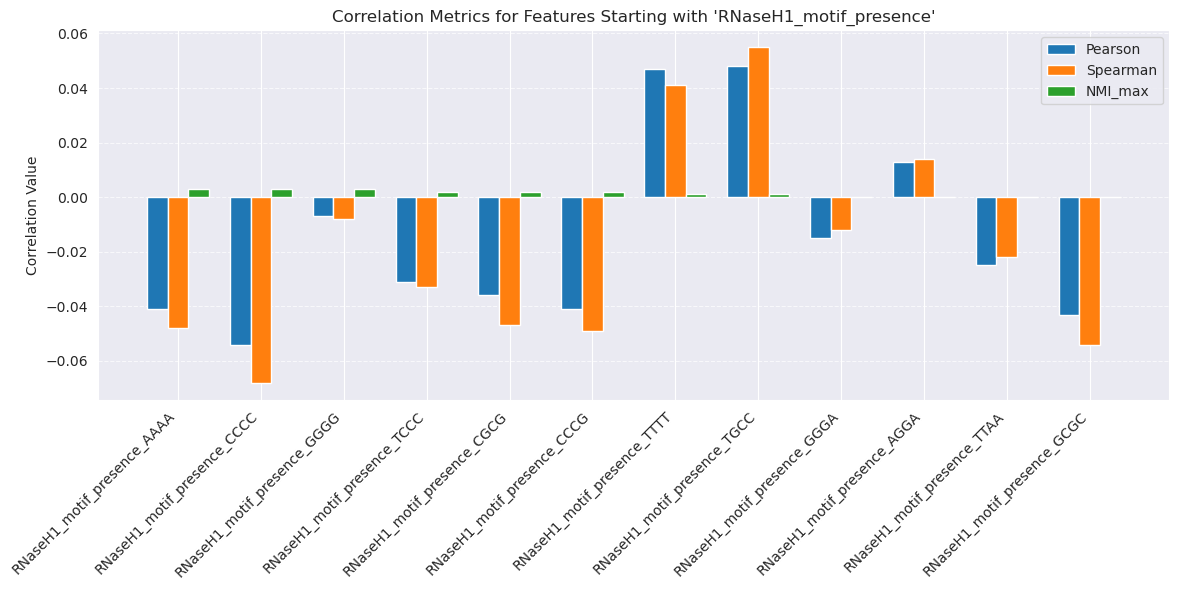

In [10]:
from notebooks.utils.correlation_test import plot_feature_correlations_by_prefix

plot_feature_correlations_by_prefix(results_df, prefix='RNaseH1_motif_presence')

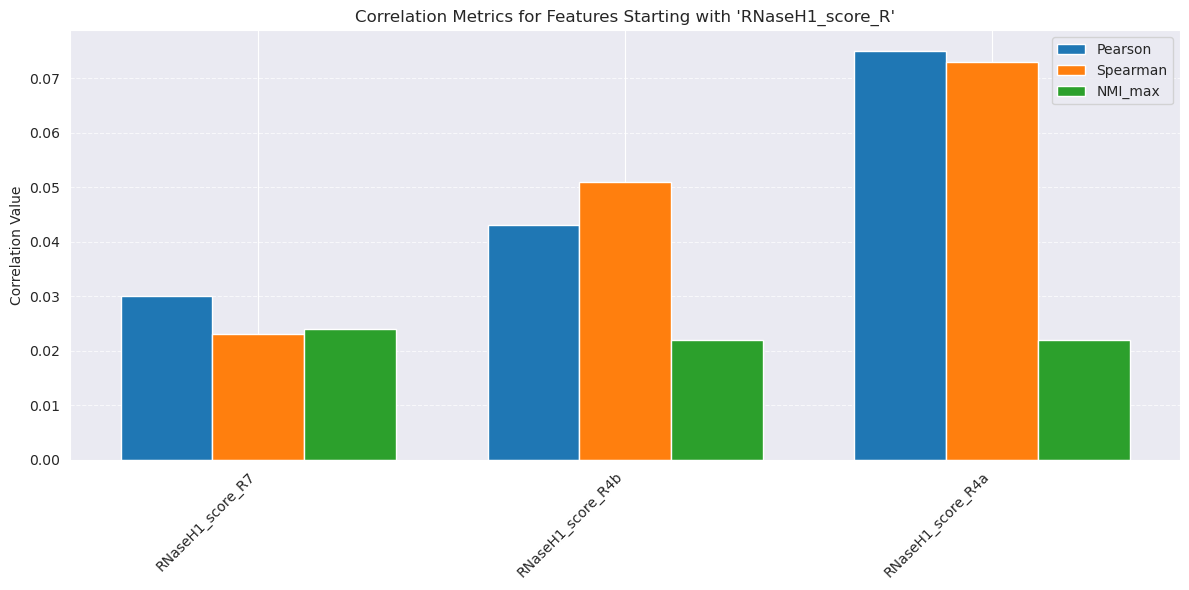

In [11]:
plot_feature_correlations_by_prefix(results_df, prefix='RNaseH1_score_R')


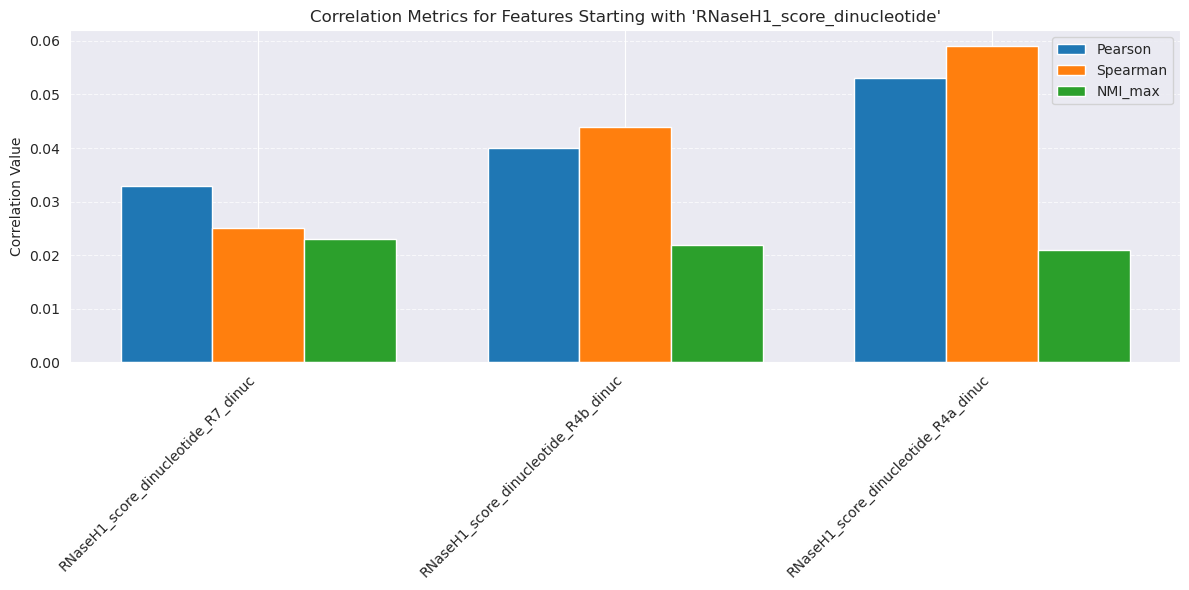

In [12]:
plot_feature_correlations_by_prefix(results_df, prefix='RNaseH1_score_dinucleotide')


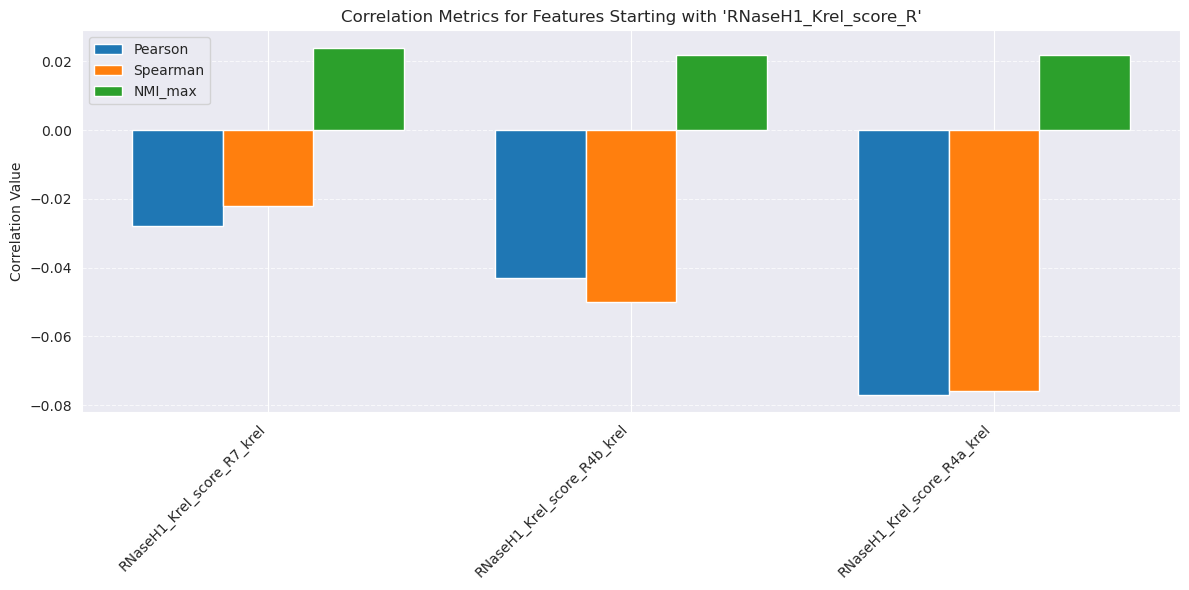

In [13]:
plot_feature_correlations_by_prefix(results_df, prefix='RNaseH1_Krel_score_R')

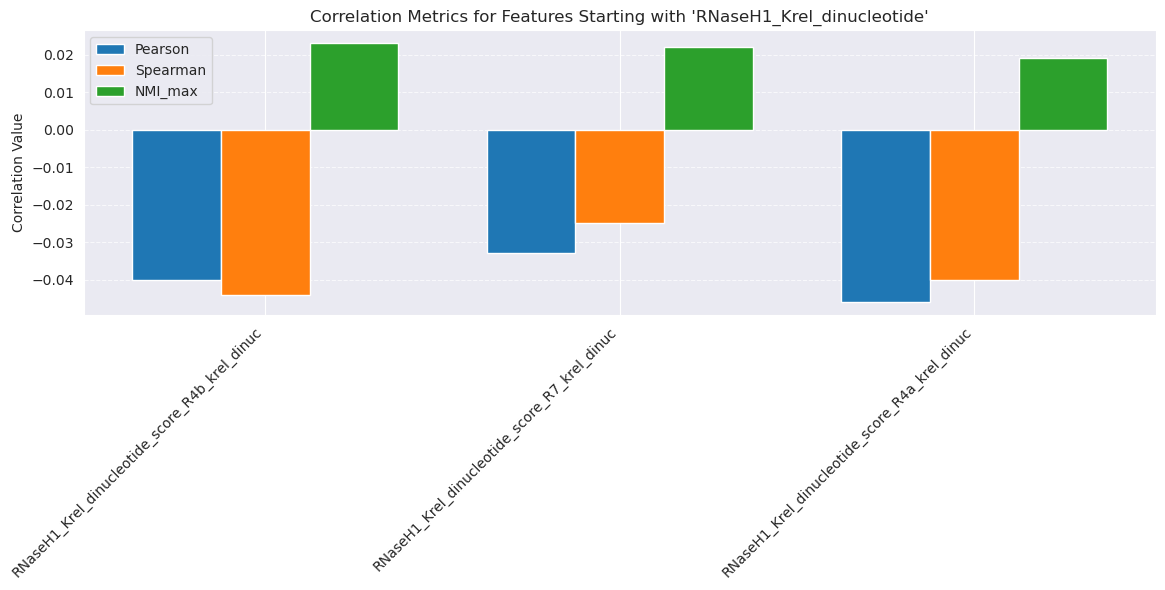

In [14]:
plot_feature_correlations_by_prefix(results_df, prefix='RNaseH1_Krel_dinucleotide')

 Save DataFrame as CSV in the current working directory

In [15]:
from notebooks.features.feature_extraction import save_feature

for feat in rNaseH1_best_features_list:
    save_feature(all_data, feat)